Import libraries

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 

Data set

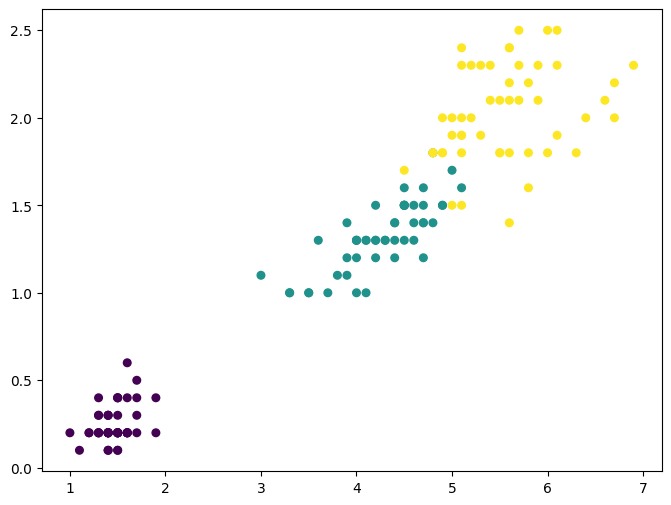

In [2]:
ds = load_iris()
X, y = ds.data, ds.target
plt.figure(figsize=(8,6))
plt.scatter(X[:,2],X[:,3], c=y, s=30)

Calculate distance between points

In [3]:
def euclideanDistance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

Model

In [4]:
class KNN:
    def __init__(self, k: int = 3) -> None:
        self.k = k
    
    def fit(self, X, y):
        self.XTrain = X
        self.yTrain = y

    def predictForx(self, x) -> int:
        distances = [euclideanDistance(x,xTrain) for xTrain in self.XTrain]
        
        kSortedIndicies = np.argsort(distances)
        kSmallestIndicies = kSortedIndicies[:self.k]
        kNearestLabels = [self.yTrain[i] for i in kSmallestIndicies]
        
        unique, counts = np.unique(kNearestLabels, return_counts=True)
        mostCommon = unique[np.argmax(counts)]
        return mostCommon


    def predictForX(self, X):
        predictions = [self.predictForx(x) for x in X]
        return predictions

Train

In [5]:
XTrain, XTest, yTrain,yTest = train_test_split(X,y,test_size=0.2)

KNNClasifier = KNN()
KNNClasifier.fit(XTrain,yTrain)
yPredicted = KNNClasifier.predictForX(XTest)

Evaluation

In [6]:
accuracy = accuracy_score(yTest,yPredicted)
print(f"Accuracy: {accuracy*100:.2f}%")

confusionMatrix = confusion_matrix(yTest,yPredicted)
print(confusionMatrix)

Accuracy: 96.67%
[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
